In [1]:
import numpy as np
def matrica(dt, sigma,r, N):
    alpha = sigma**2*dt
    beta  = r*dt
    n     = np.arange(0, N+1)
    dn    = 1-alpha*n[1:-1]**2-beta # n=1...N-1
    un    = 0.5*(alpha*(n[2:-1]-1)**2+beta*(n[2:-1]-1)) # n=2...N-1
    ln    = 0.5*(alpha*(n[1:-2]+1)**2-beta*(n[1:-2]+1)) # n=1...N-2
    A     = np.diag(dn)+np.diag(un,1)+np.diag(ln,-1)
    return A
def z(dt, sigma,r, N):
    alpha = sigma**2*dt
    beta  = r*dt
    ln    = 0.5*(alpha*(0+1)**2-beta*(0+1))
    un    = 0.5*(alpha*(N-1)**2+beta*(N-1))
    Z     = np.zeros((N-1,N-1))
    Z[0,0] = ln
    Z[-1,-1] = un
    return Z
matrica(.5,1.,1.,10)
z(.5,1.,1.,10)
def korak(prethodni, dt, sigma, r, N):
    return np.dot(matrica(dt, sigma,r, N)+z(dt, sigma,r, N), prethodni)
def rjesenje(dt, sigma, r, E, N, T,Smax):
    S  = np.linspace(0, Smax, N-1)
    PU = np.where(S-E>0,S-E,0)
    rjesenja = []
    rjesenja.append(PU)
    vremena = []
    vremena.append(0)
    t = dt
    vm1 = PU
    while(t<=T):
        vm1 = korak(vm1, dt, sigma, r, N)
        rjesenja.append(vm1)
        vremena.append(t)
        t+=dt
    return vremena, S, np.array(rjesenja)

In [2]:
import matplotlib.pyplot as plt
Rj = rjesenje(dt=0.25/2000, sigma=0.4, r=0.1, E=10., N=1000, T=0.25,Smax=20)
plt.pcolormesh(Rj[0],Rj[1],Rj[2].T)

/home/marko/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:956: RuntimeWarning: overflow encountered in double_scalars
  resdat /= (vmax - vmin)
/home/marko/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:956: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/marko/miniconda3/lib/python3.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5,0,'Numeričko-analitičko')

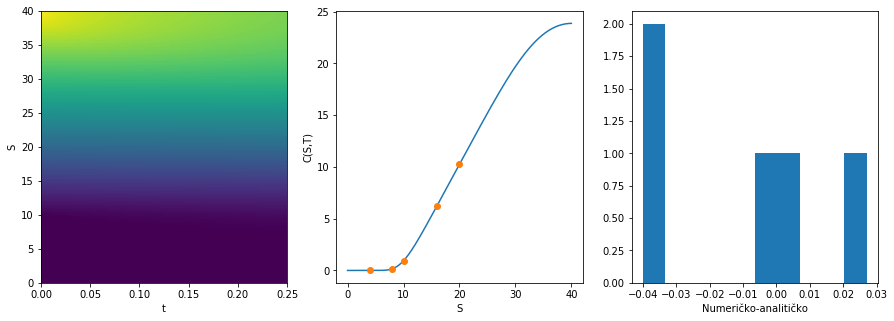

In [3]:
Rj = rjesenje(dt=0.25/2000, sigma=0.4, r=0.1, E=10., N=200, T=0.25,Smax=40)
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].pcolormesh(Rj[0],Rj[1],Rj[2].T)
ax[0].set_xlabel("t")
ax[0].set_ylabel("S")
ax[1].set_xlabel("S")
ax[1].set_ylabel("C(S,T)")
ax[1].plot(Rj[1], Rj[2][-1])
ax[1].plot([4,8,10,16,20],[1.067322*10**(-6),0.149335,0.916291,6.252287,10.247014],"o")
ax[2].hist(np.array([Rj[2][-1][np.argmin(np.abs(Rj[1]-r))] for r in [4,8,10,16,20]])-np.array([1.067322*10**(-6),0.149335,0.916291,6.252287,10.247014]))
ax[2].set_xlabel("Numeričko-analitičko")

# Primjer sustava vremenski promjenjive male volatilnosti

In [5]:
import pandas as pd
tables = pd.read_html("https://www.myfxbook.com/forex-market/currencies/AUDCAD-historical-data",parse_dates=True)[3]

/home/marko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


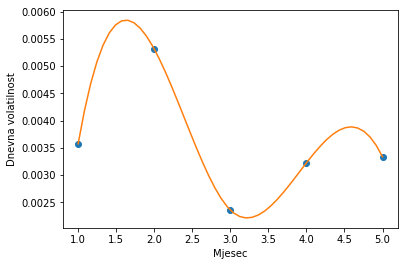

In [6]:
for c in ['Open', ]:
    tables[c]=tables[c].astype(float) # Iako je astype numpy metoda
    # Pandas nasljeđuje numpy!
for c in ["Date"]:
    tables[c] = pd.to_datetime(tables[c], infer_datetime_format=True)
tables=tables[["Date",'Open',]]
tables["r"]=np.nan
tables["r"][1:]=np.diff(np.log(tables["Open"]))
tables=tables.dropna()
from scipy.interpolate import interp1d
X=tables.groupby(tables["Date"].dt.month).std()
plt.plot(X.index,X["r"],"o")
dnevna_volatilnost = interp1d(X.index,X["r"],"cubic")
plt.plot(np.linspace(1,5),dnevna_volatilnost(np.linspace(1,5)))
plt.xlabel("Mjesec")
plt.ylabel("Dnevna volatilnost");

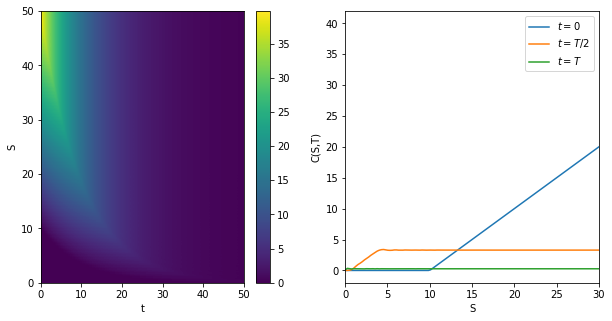

In [7]:
import numpy as np
def matrica(dt, sigma,r, N):
    alpha = sigma**2*dt
    beta  = r*dt
    n     = np.arange(0, N+1)
    dn    = 1-alpha*n[1:-1]**2-beta # n=1...N-1
    un    = 0.5*(alpha*(n[2:-1]-1)**2+beta*(n[2:-1]-1)) # n=2...N-1
    ln    = 0.5*(alpha*(n[1:-2]+1)**2-beta*(n[1:-2]+1)) # n=1...N-2
    A     = np.diag(dn)+np.diag(un,1)+np.diag(ln,-1)
    return A
def z(dt, sigma,r, N):
    alpha = sigma**2*dt
    beta  = r*dt
    ln    = 0.5*(alpha*(0+1)**2-beta*(0+1))
    un    = 0.5*(alpha*(N-1)**2+beta*(N-1))
    Z     = np.zeros((N-1,N-1))
    Z[0,0] = ln
    Z[-1,-1] = un
    return Z
matrica(.5,1.,1.,10)
z(.5,1.,1.,10)
def korak(prethodni, dt, sigma, r, N):
    return np.dot(matrica(dt, sigma,r, N)+z(dt, sigma,r, N), prethodni)
def rjesenje(dt, sigma, r, E, N, T,Smax):
    S  = np.linspace(0, Smax, N-1)
    PU = np.where(S-E>0,S-E,0)
    rjesenja = []
    rjesenja.append(PU)
    vremena = []
    vremena.append(0)
    t = dt
    vm1 = PU
    while(t<=T):
        vm1 = korak(vm1, dt, sigma(t), r, N)
        rjesenja.append(vm1)
        vremena.append(t)
        t+=dt
    return vremena, S, np.array(rjesenja)
Rj = rjesenje(dt=50/40000., sigma=lambda t:dnevna_volatilnost((t/30.)+1), r=0.1, E=10., N=200, T=50.,Smax=50)
f, ax = plt.subplots(1,2,figsize=(10,5))
im=ax[0].pcolormesh(Rj[0],Rj[1],Rj[2].T)
plt.colorbar(im,ax=ax[0])
ax[0].set_xlabel("t")
ax[0].set_ylabel("S")
ax[1].set_xlabel("S")
ax[1].set_ylabel("C(S,T)")
ax[1].plot(Rj[1], Rj[2][0],label="$t=0$");
ax[1].plot(Rj[1], Rj[2][20000],label="$t=T/2$");
ax[1].plot(Rj[1], Rj[2][-1],label="$t=T$");
ax[1].legend()
ax[1].set_xlim(0,30);